In [1]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

C:\Users\APOORV\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\APOORV\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\APOORV\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\APOORV\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

In [38]:
import os
import numpy as np 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import TensorBoard
from time import strftime
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
%matplotlib inline

# constants

#get cifar dataset

In [3]:
log_dir='tensorboards_cifar_logs/'

Label_Names=['Plane','car','bird','cat','deer','dog','frog','horse','ship']
image_wid=32
image_hei=32
imagepixel=image_wid*image_hei
colour_channels=3
total_inputs=imagepixel*colour_channels
validation_size=10000
small_train_size=1000

In [4]:
(x_train_all,y_train_all),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()


In [5]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

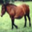

In [6]:
pic= array_to_img(x_train_all[7])
display(pic)

In [7]:
y_train_all.shape

(50000, 1)

In [8]:
y_train_all[7][0]

7

In [9]:
Label_Names[y_train_all[7][0]]

'horse'

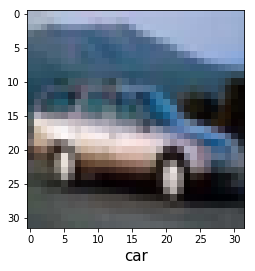

In [10]:
plt.imshow(x_train_all[4])
plt.xlabel(Label_Names[y_train_all[4][0]],fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.yticks([])
    plt.xticks([])    
    plt.imshow(x_train_all[i])
   
  
    

In [11]:
x_train_all[0].shape

(32, 32, 3)

In [12]:
x_train_all.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess data

In [14]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [15]:
x_train_all,x_test=x_train_all/225.0,x_test/225.0

In [16]:
x_train_all[0][0][0][0]

0.26222222222222225

In [17]:
x_train_all=x_train_all.reshape(x_train_all.shape[0],total_inputs)

In [18]:
x_train_all.shape

(50000, 3072)

In [19]:
x_test=x_test.reshape(x_test.shape[0],total_inputs)

In [20]:
x_test.shape

(10000, 3072)

## create validation dataset

In [21]:
x_val=x_train_all[:validation_size]
y_val=y_train_all[:validation_size]
x_val.shape

(10000, 3072)

In [22]:
x_train=x_train_all[validation_size:] 
y_train=y_train_all[validation_size:]
x_train.shape

(40000, 3072)

### create a small dataset (for illustration)


In [23]:
x_train_xs=x_train[:small_train_size]
y_train_xs=y_train[:small_train_size]


## define the neural network using keras

In [47]:
#perceptronn model
model_1=Sequential([
    Dense(units=128,input_dim=total_inputs,activation='relu',name='hidden1'),
    Dense(units=64,activation='relu',name='hidden2'),
    Dense(16,activation='relu',name='hidden3'),
    Dense(10,activation='softmax',name='hidden4')
    
])
#categorical loss entropy
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [48]:
model_2=Sequential()
model_2.add(Dropout(0.2,seed=42,input_shape=(total_inputs,))) 
model_2.add(Dense(128,activation='relu',name='m2_hidden1'))
model_2.add(Dense(64,activation='relu',name='m2_hidden2'))
model_2.add(Dense(16,activation='relu',name='m2_hidden3'))
model_2.add(Dense(10,activation='softmax',name='m2_output'))
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [25]:
type(model_1)

keras.engine.sequential.Sequential

In [49]:
model_3=Sequential()
model_3.add(Dropout(0.2,seed=42,input_shape=(total_inputs,))) 
model_3.add(Dense(128,activation='relu',name='m2_hidden1'))
model_3.add(Dropout(0.25,seed=42))
model_3.add(Dense(64,activation='relu',name='m2_hidden2'))
model_3.add(Dense(16,activation='relu',name='m2_hidden3'))
model_3.add(Dense(10,activation='softmax',name='m2_output'))
model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 128)               393344    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 16)                1040      
_________________________________________________________________
hidden4 (Dense)              (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [27]:
#calculation
32*32*3*128+128+(128*64+64)+(64*16+16)+(16*10+10)

402810

# TensorBoard(visualing learning)

In [28]:
def get_tensorboard(model_name):

    folder_name= f'model_1 at {strftime("%H ,%M")}'
    print(folder_name)
    dir_paths=os.path.join(log_dir,folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err :
        print(err.strerror)
    else:
        print("sucessfully create a directory")
    return TensorBoard(log_dir=dir_paths)

In [29]:
sample_per_batch=1000

# fit the model

In [37]:
#%time
#nr_epochs=150
#model_1.fit(x_train_xs,y_train_xs,batch_size=sample_per_batch,epochs=nr_epochs,callbacks=[get_tensorboard('Model 1')],verbose=0,validation_data=(x_val,y_val))

Wall time: 0 ns
model_1 at 15 59
sucessfully create a directory


In [52]:
%%time
nr_epochs=100
model_1.fit(x_train,y_train,batch_size=sample_per_batch,epochs=nr_epochs,callbacks=[get_tensorboard('Model 1 XL')],verbose=0,validation_data=(x_val,y_val))

model_1 at 16 35
sucessfully create a directory
Wall time: 4min 32s


In [51]:
%%time
nr_epochs=150
model_2.fit(x_train_xs,y_train_xs,batch_size=sample_per_batch,epochs=nr_epochs,callbacks=[get_tensorboard('Model 2 Xl')],verbose=0,validation_data=(x_val,y_val))

model_1 at 16 32
sucessfully create a directory
Wall time: 2min 21s


In [53]:
%%time
nr_epochs=150
model_3.fit(x_train,y_train,batch_size=sample_per_batch,epochs=nr_epochs,callbacks=[get_tensorboard('Model 3 Xl')],verbose=0,validation_data=(x_val,y_val))

model_1 at 16 39
sucessfully create a directory
Wall time: 9min 24s
